In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data.csv')

# Remove rows where the district is 'Total'
data = data[data['District'] != 'Total']

# Define broader categories
crime_categories = {
    'Violent Crimes': [
        'Murder', 'Attempt to commit Murder', 'Culpable Homicide not amounting to Murder',
        'Attempt to commit Culpable Homicide', 'Rape', 'Custodial Rape', 'Custodial_Gang Rape',
        'Custodial_Other Rape', 'Rape other than Custodial', 'Rape_Gang Rape', 'Rape_Others',
        'Attempt to commit Rape'
    ],
    'Kidnapping & Abduction': [
        'Kidnapping & Abduction_Total', 'Kidnapping & Abduction in order to Murder',
        'Kidnapping for Ransom', 'Kidnapping & Abduction of Women to compel her for marriage',
        'Other Kidnapping'
    ],
    'Robbery': [
        'Dacoity', 'Dacoity with Murder', 'Other Dacoity', 'Making Preparation and Assembly for committing Dacoity',
        'Robbery'
    ],
    'Property Crimes': [
        'Criminal Trespass/Burglary', 'Criminal Trespass or Burglary', 'House Trespass & House Breaking',
        'Theft', 'Auto Theft', 'Other Thefts'
    ],
    'Public Order Offenses': [
        'Unlawful Assembly', 'Riots', 'Riots_Communal', 'Riots_Industrial', 'Riots_Political',
        'Riots_Caste Conflict', 'Riots_SC/STs Vs Non-SCs/STs', 'Riots_Other Caste Conflict',
        'Riots_Agrarian', 'Riots_Students', 'Riots_Sectarian', 'Riots_Others'
    ],
    'Fraud': [
        'Criminal Breach of Trust', 'Cheating', 'Forgery', 'Counterfeiting',
        'Counterfeit Offences related to Counterfeit Coin', 'Counterfeiting Government Stamp',
        'Counterfeit currency & Bank notes', 'Counterfeiting currency notes/Bank notes',
        'Using forged or counterfeiting currency/Bank notes', 'Possession of forged or counterfeiting currency/Bank notes',
        'Making or Possessing materials for forged currency/Bank notes', 'Making or Using documents resembling currency'
    ],
    'Other Crimes': [
        'Arson', 'Grievous Hurt', 'Hurt', 'Acid attack', 'Attempt to Acid Attack', 'Dowry Deaths',
        'Assault on Women with intent to outrage her Modesty', 'Sexual Harassment',
        'Assault or use of criminal force to women with intent to Disrobe', 'Voyeurism', 'Stalking',
        'Other Assault on Women', 'Insult to the Modesty of Women', 'At Office premises',
        'Other places related to work', 'In Public Transport system', 'Places other than 231, 232 & 233',
        'Cruelty by Husband or his Relatives', 'Importation of Girls from Foreign Country',
        'Causing Death by Negligence', 'Deaths due to negligent driving/act', 'Deaths due to Other Causes',
        'Offences against State', 'Sedition', 'Other offences against State',
        'Offences promoting enmity between different groups', 'Promoting enmity between different groups',
        'Imputation, assertions prejudicial to national integration', 'Extortion',
        'Disclosure of Identity of Victims', 'Incidence of Rash Driving', 'HumanTrafficking',
        'Unnatural Offence', 'Other IPC crimes'
    ]
}

# Aggregate crime counts into broader categories using assign()
data = data.assign(**{category: data[crimes].sum(axis=1) for category, crimes in crime_categories.items()})

# Drop the original crime type columns
data.drop(columns=[col for crimes in crime_categories.values() for col in crimes], inplace=True)

# Save the modified dataset to a new CSV file
data.to_csv('data_with_broad_categories.csv', index=False)


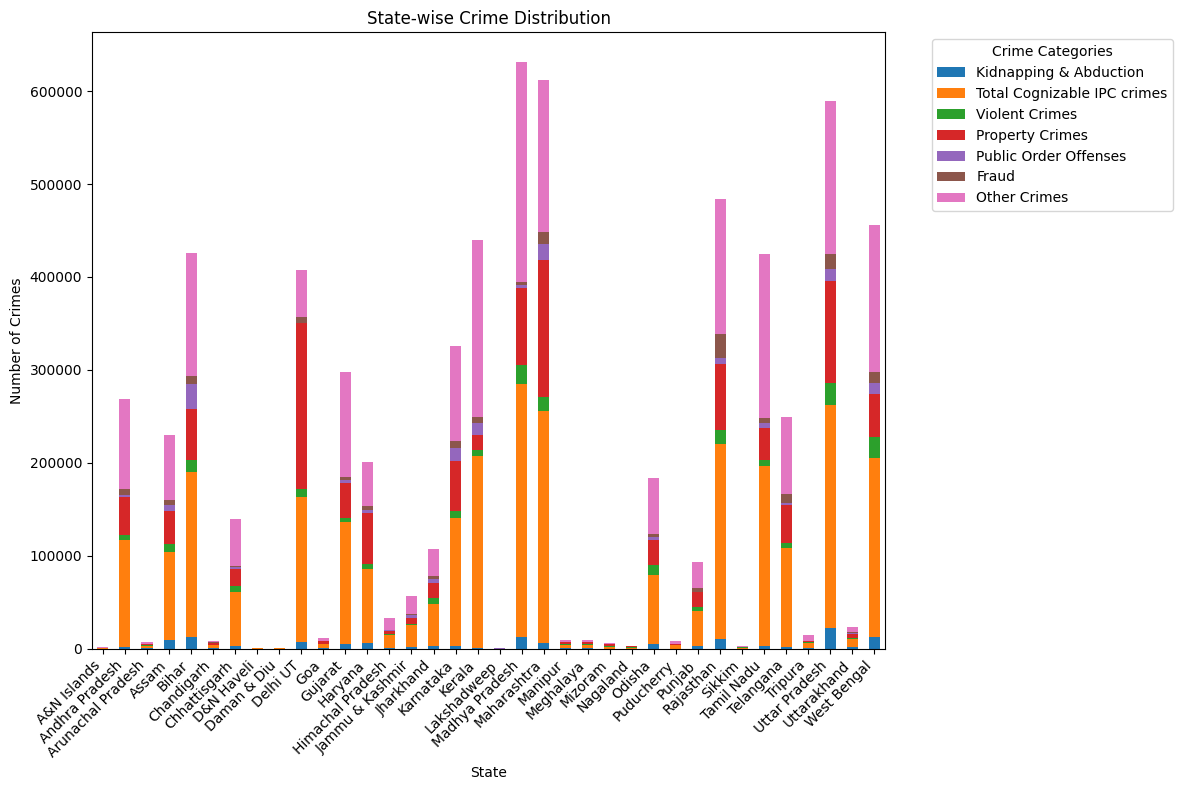

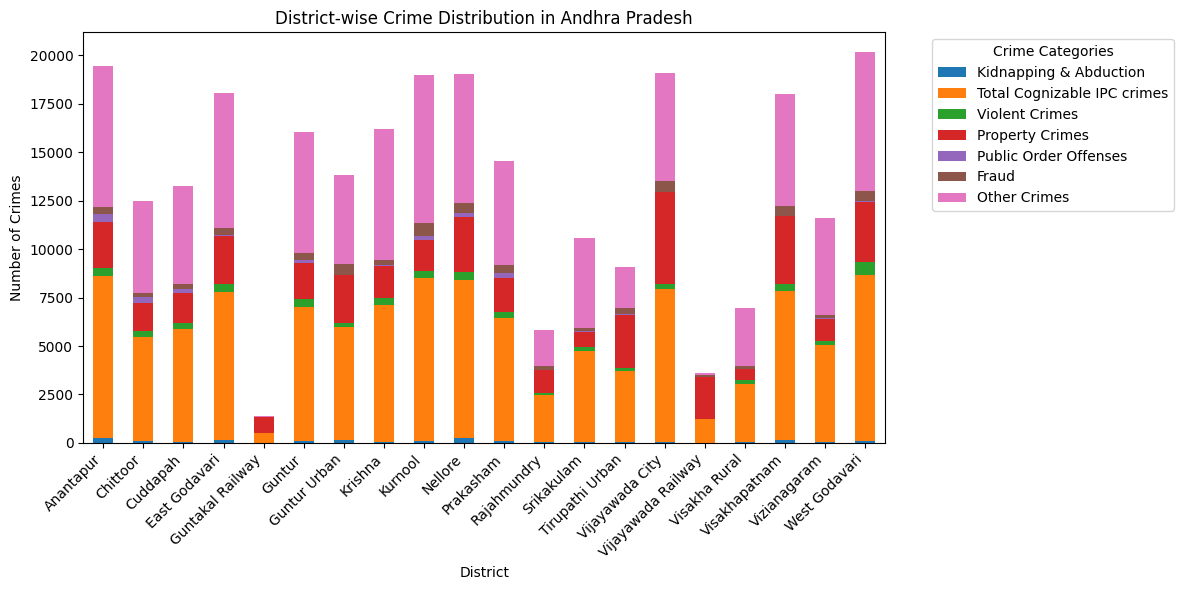

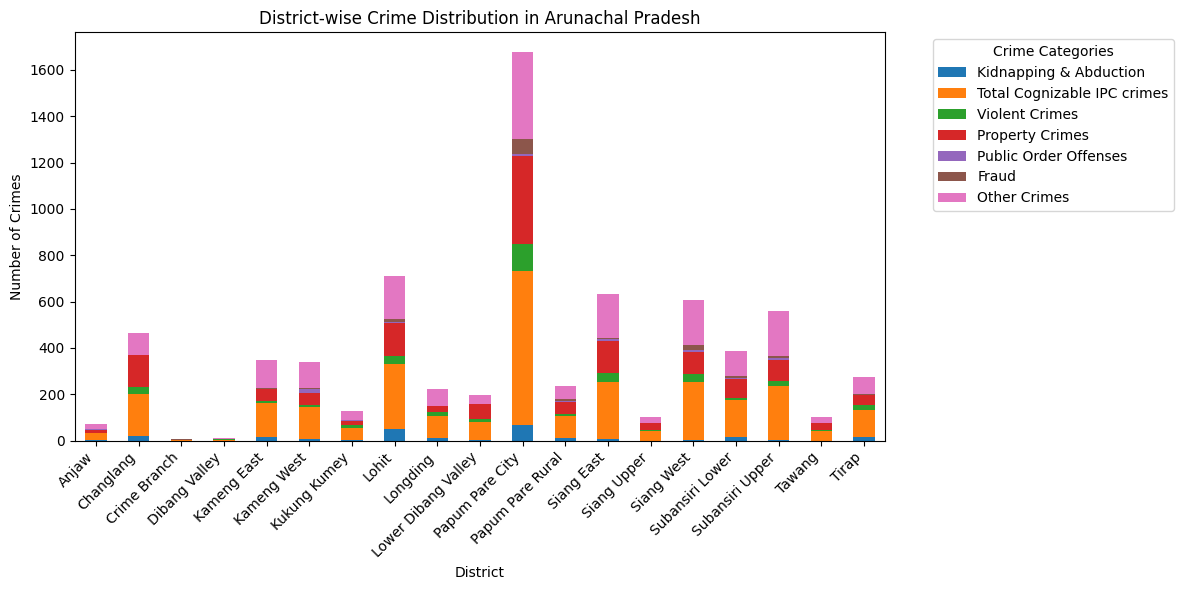

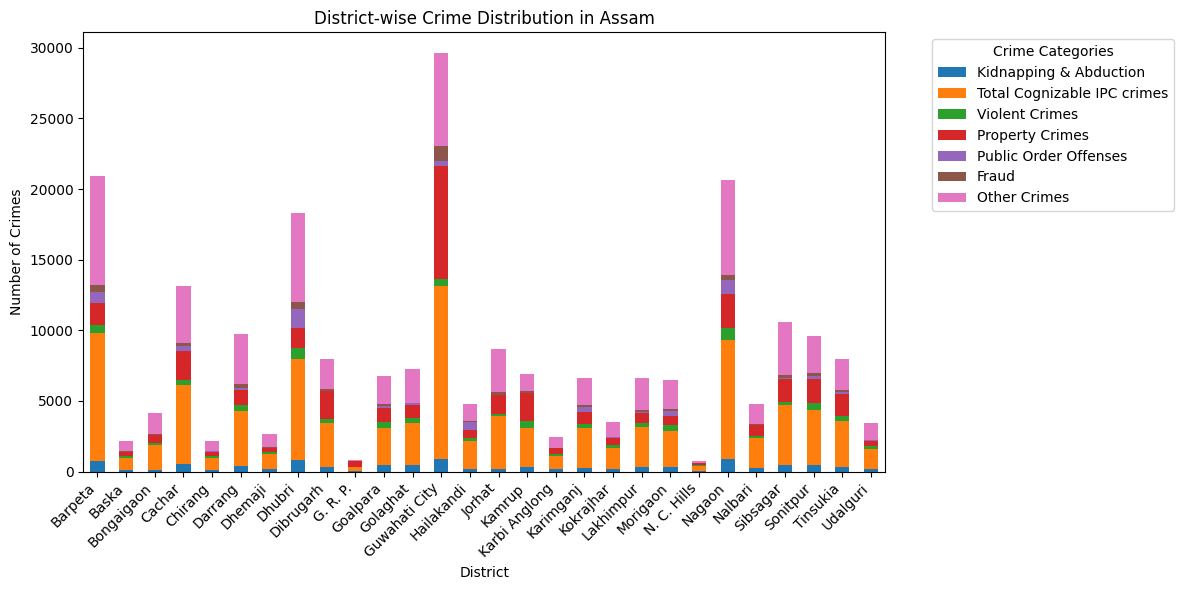

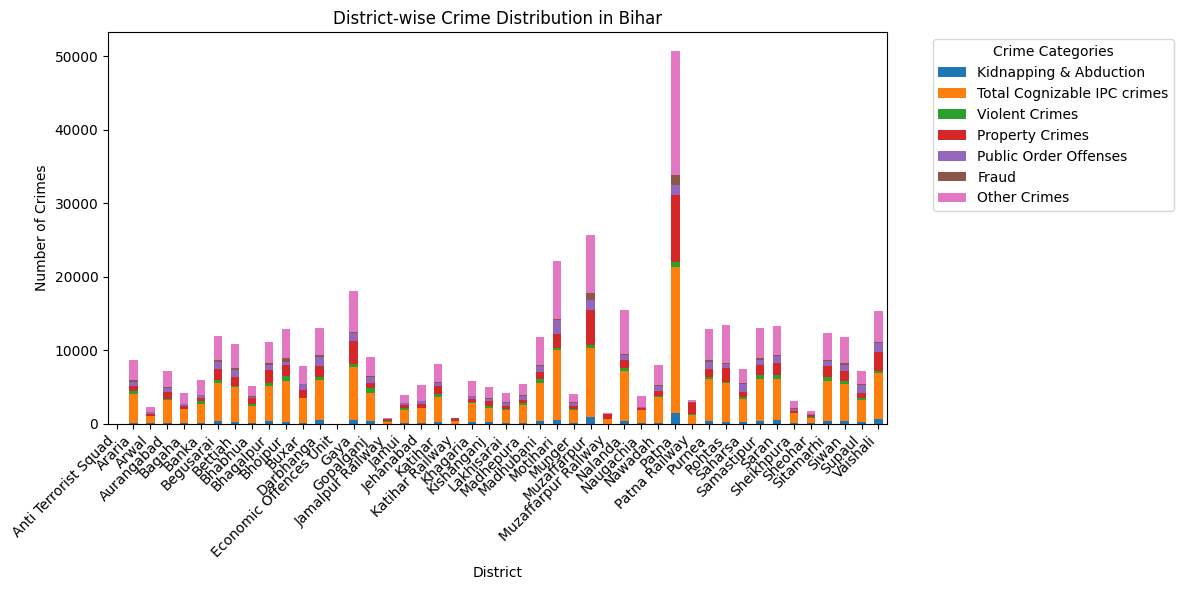

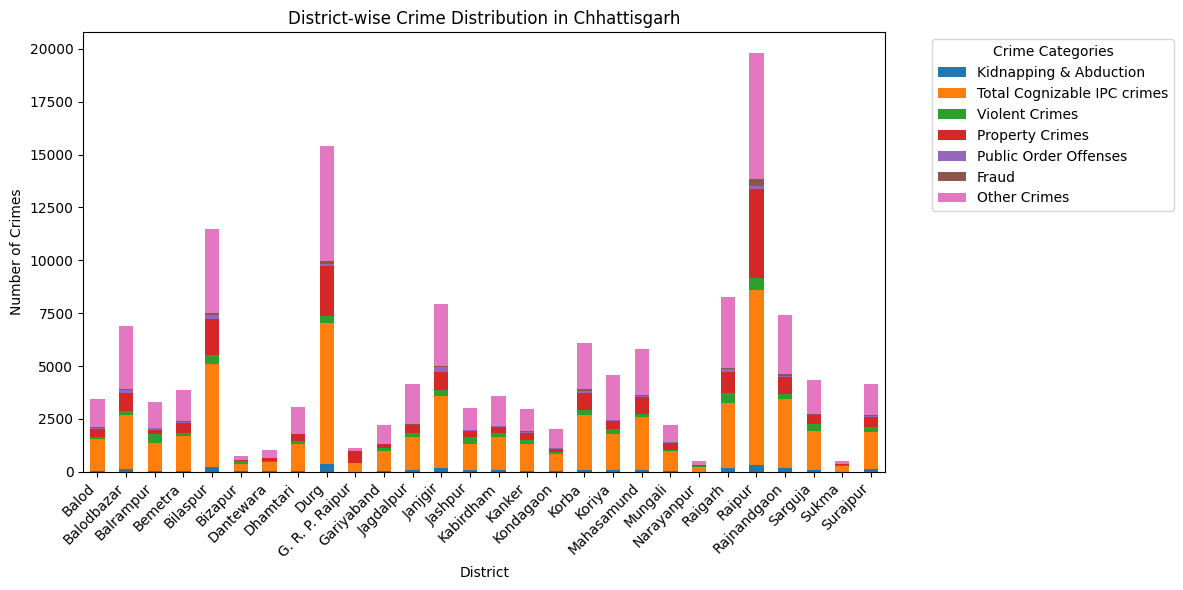

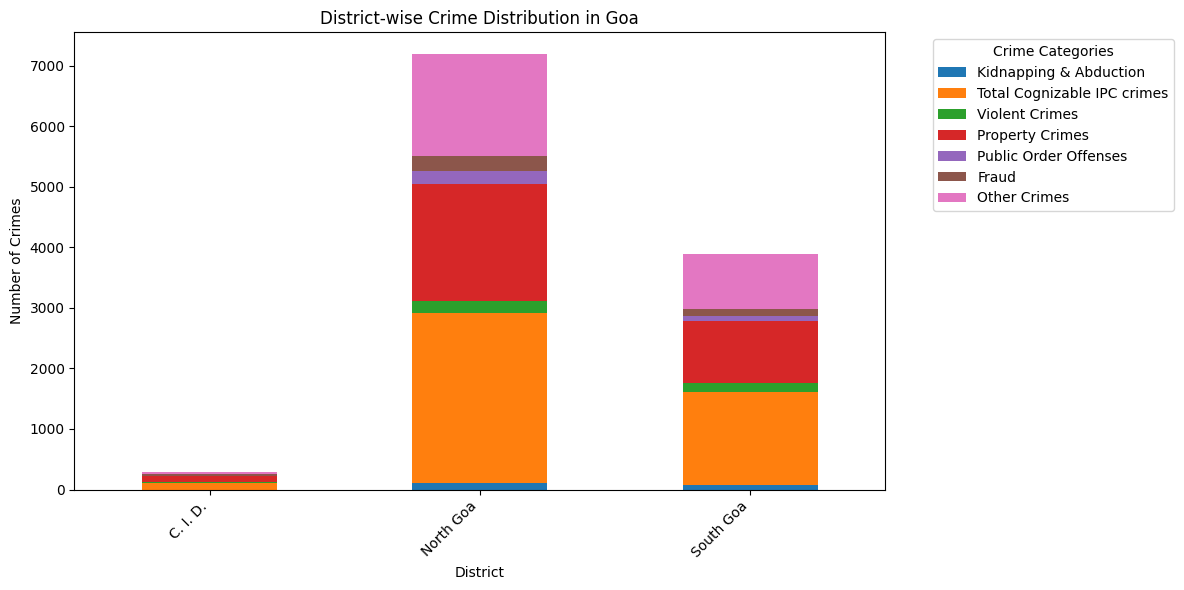

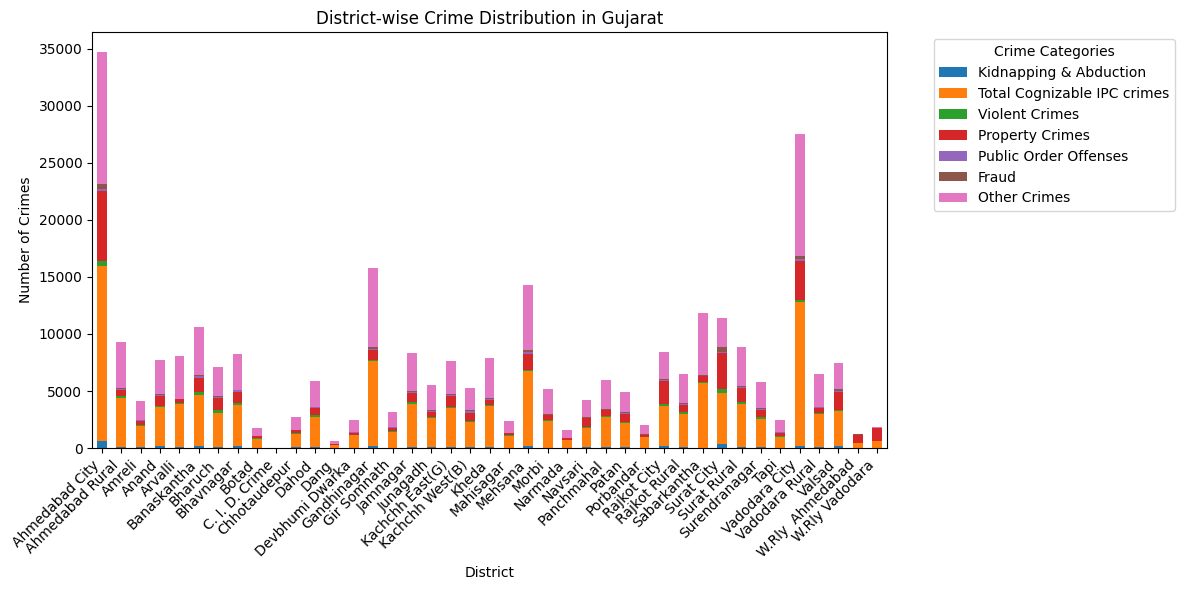

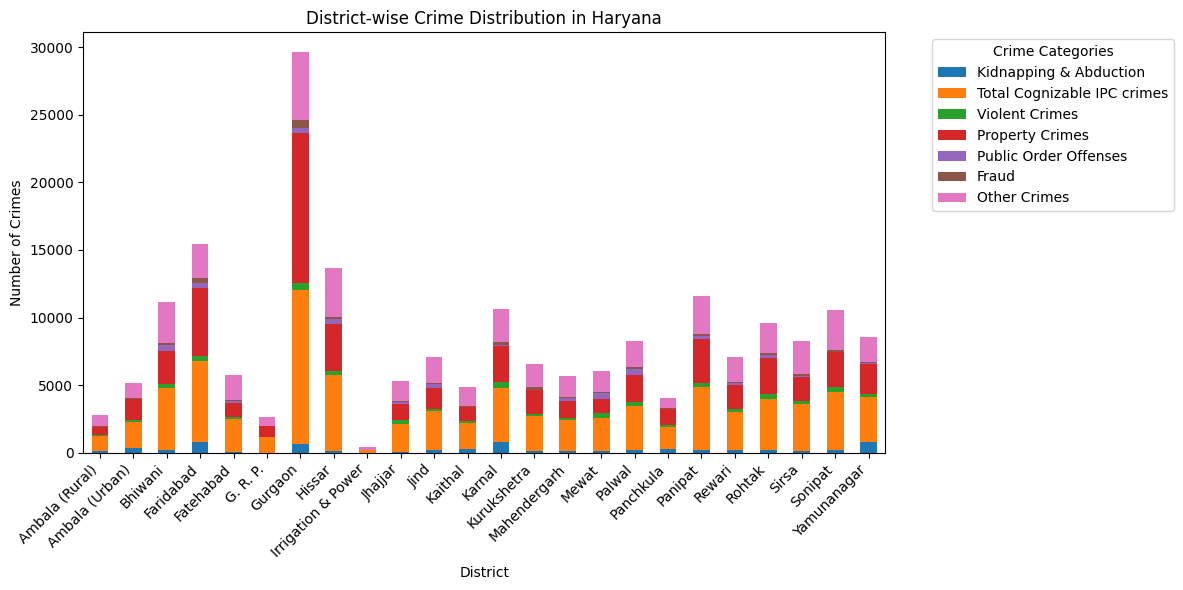

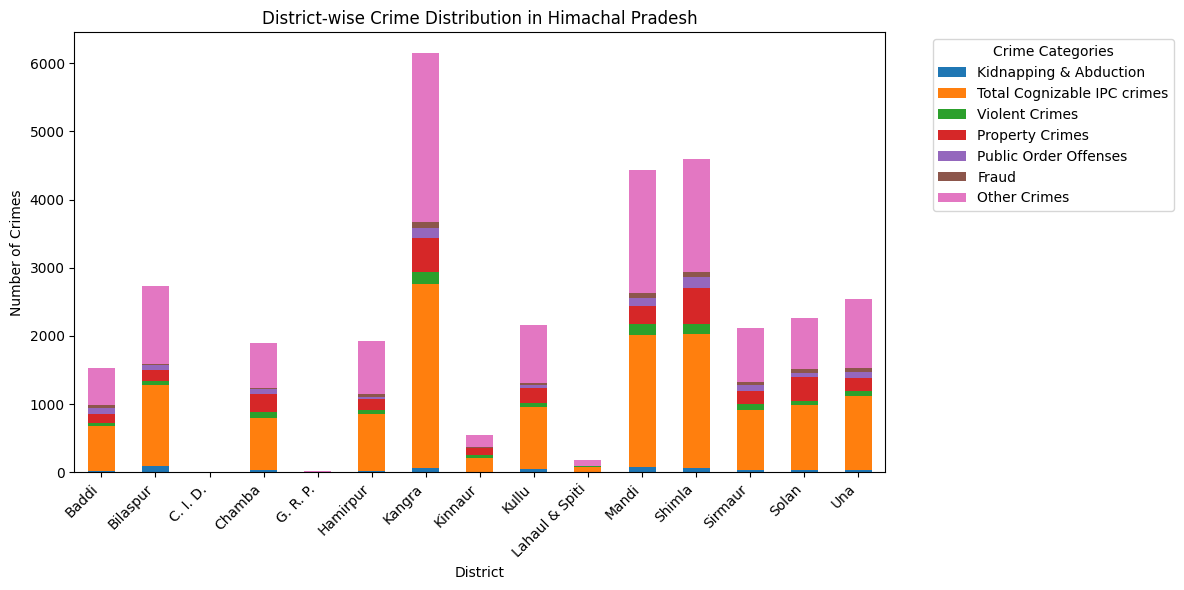

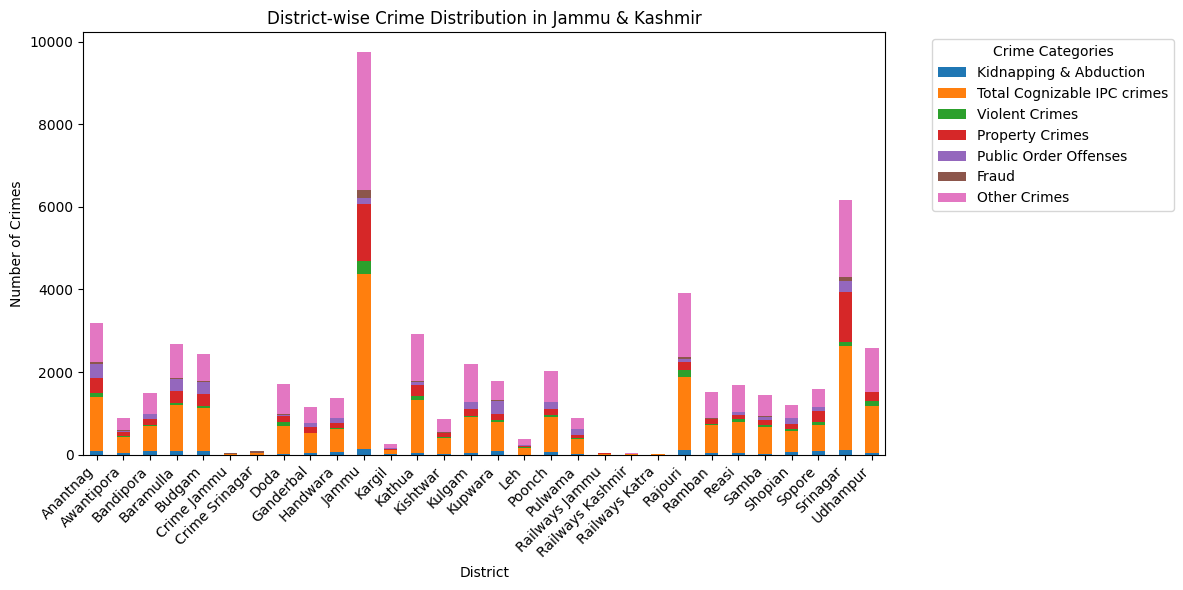

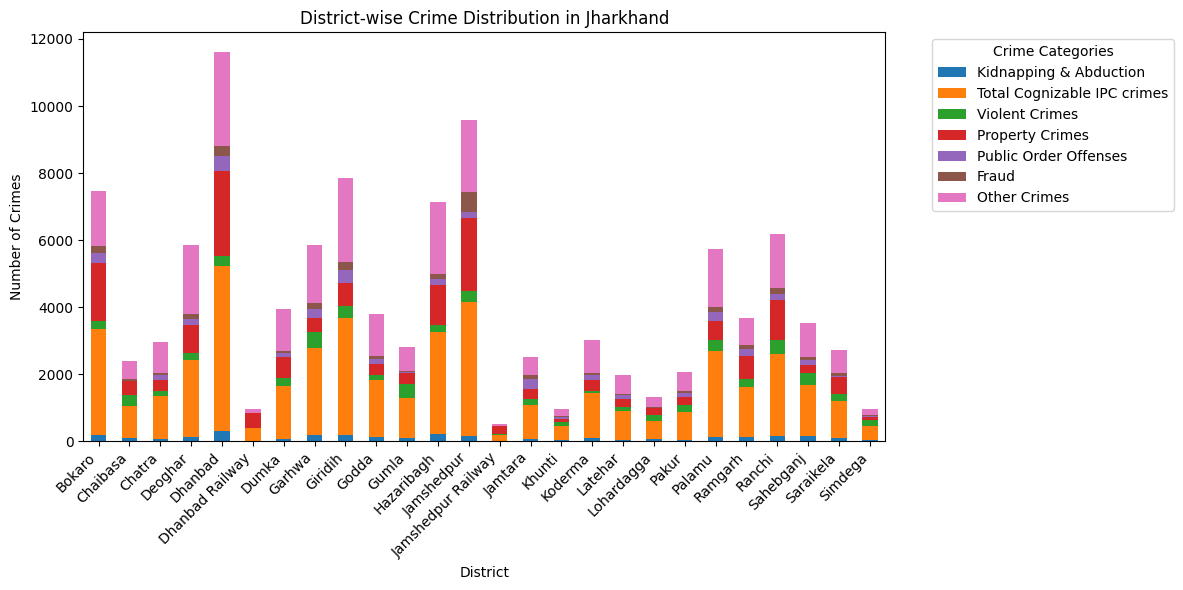

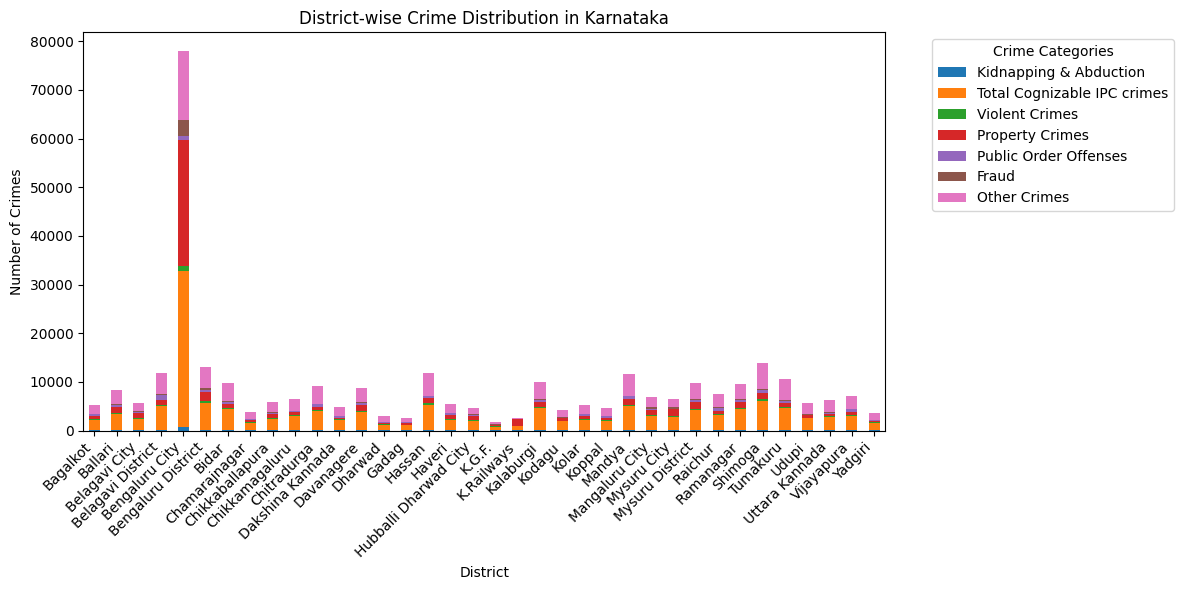

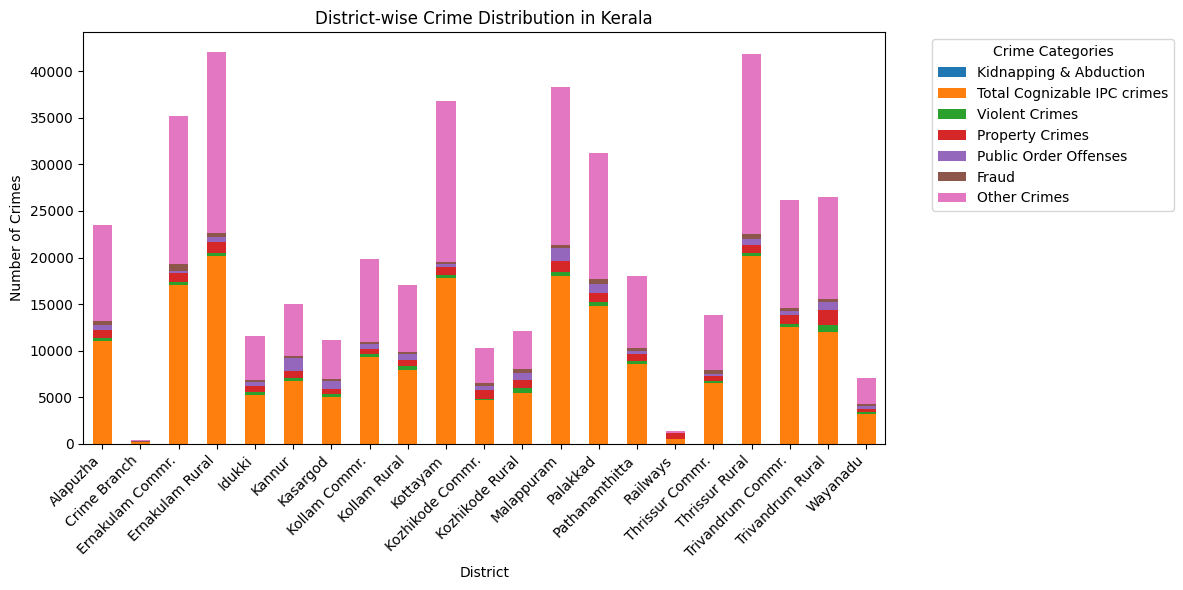

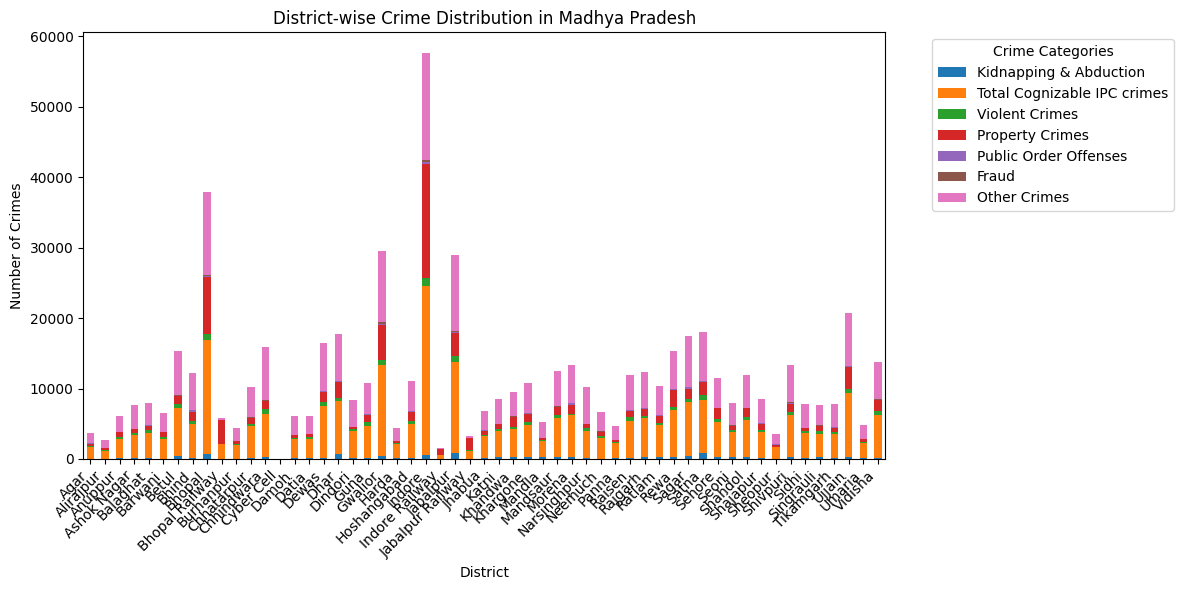

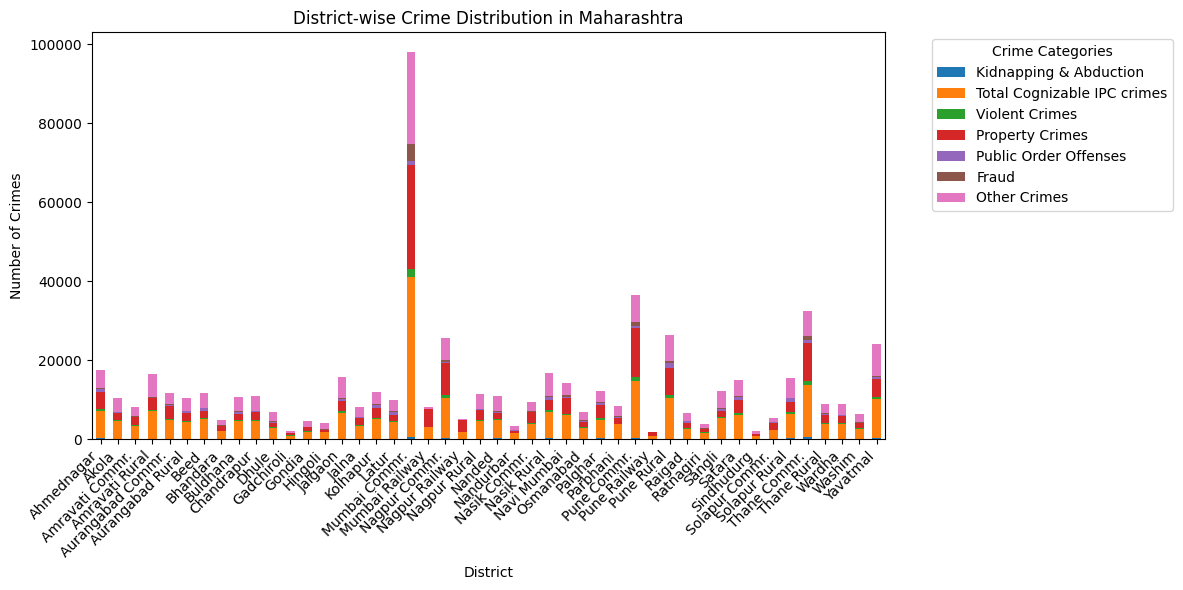

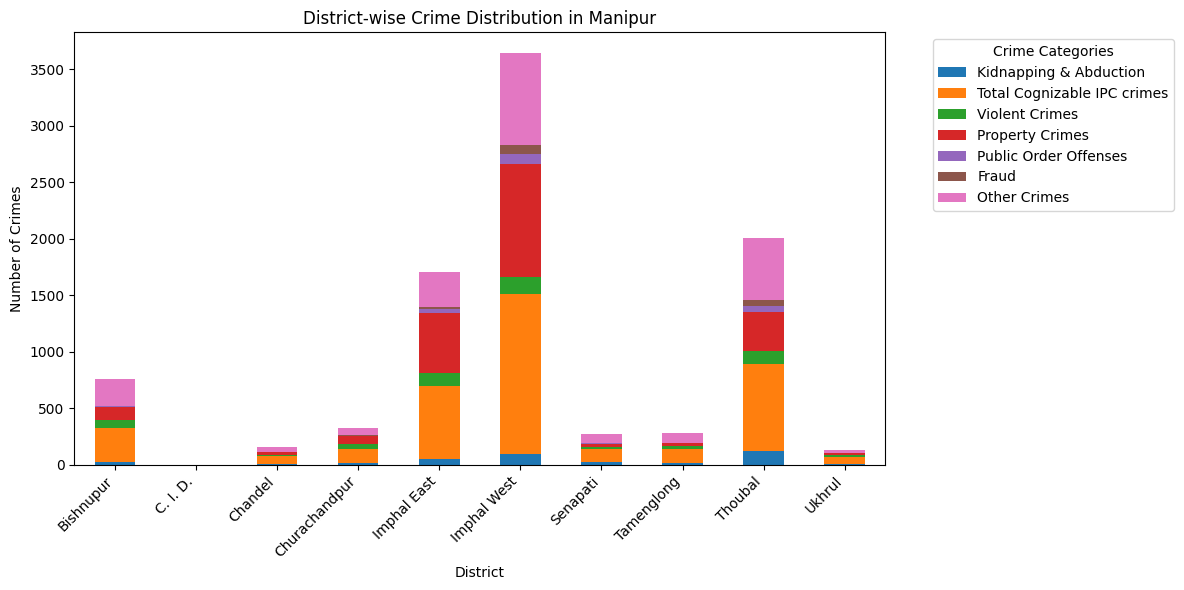

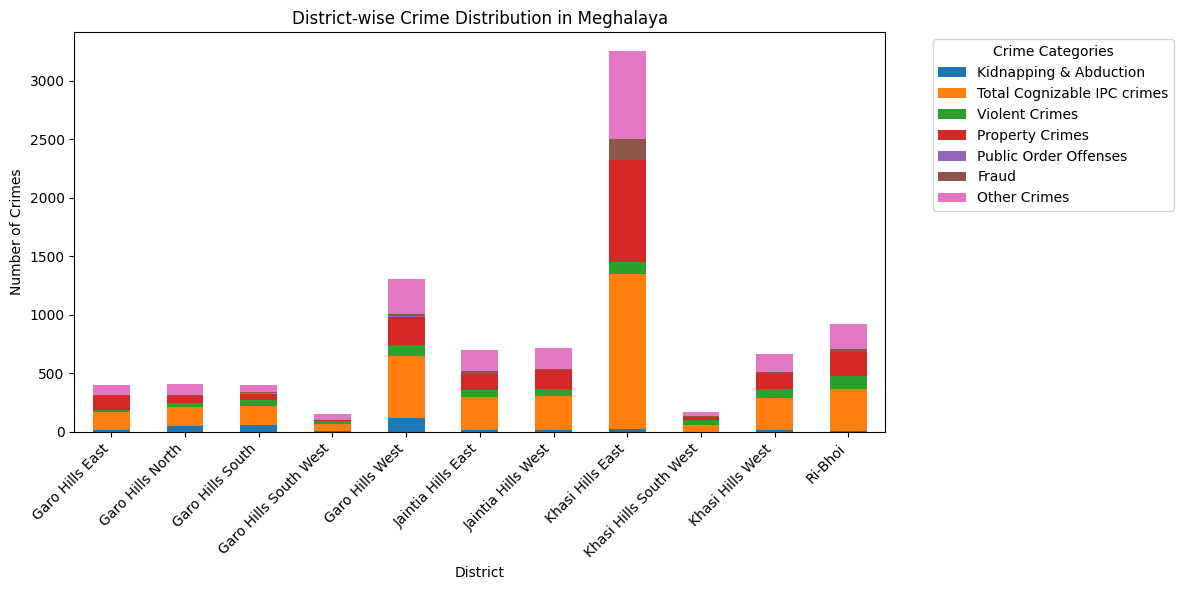

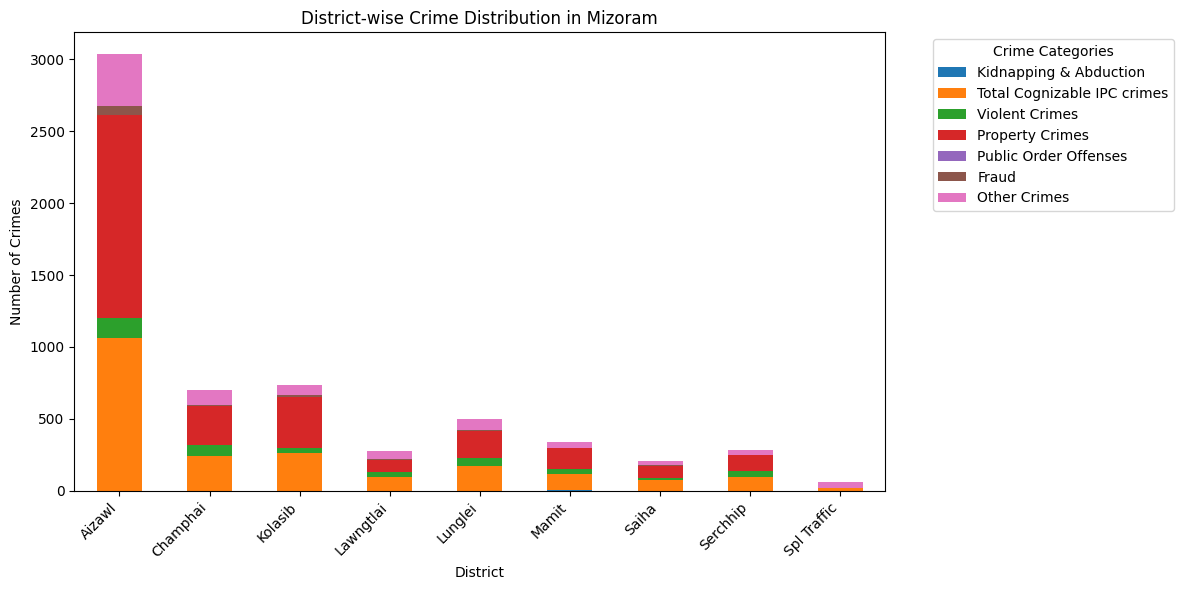

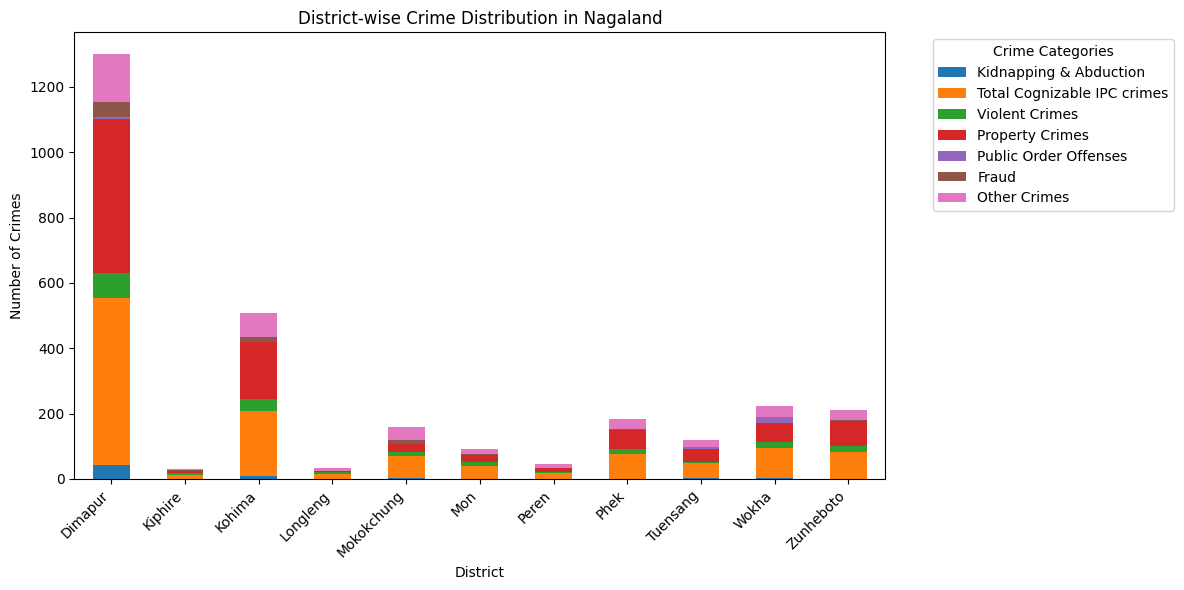

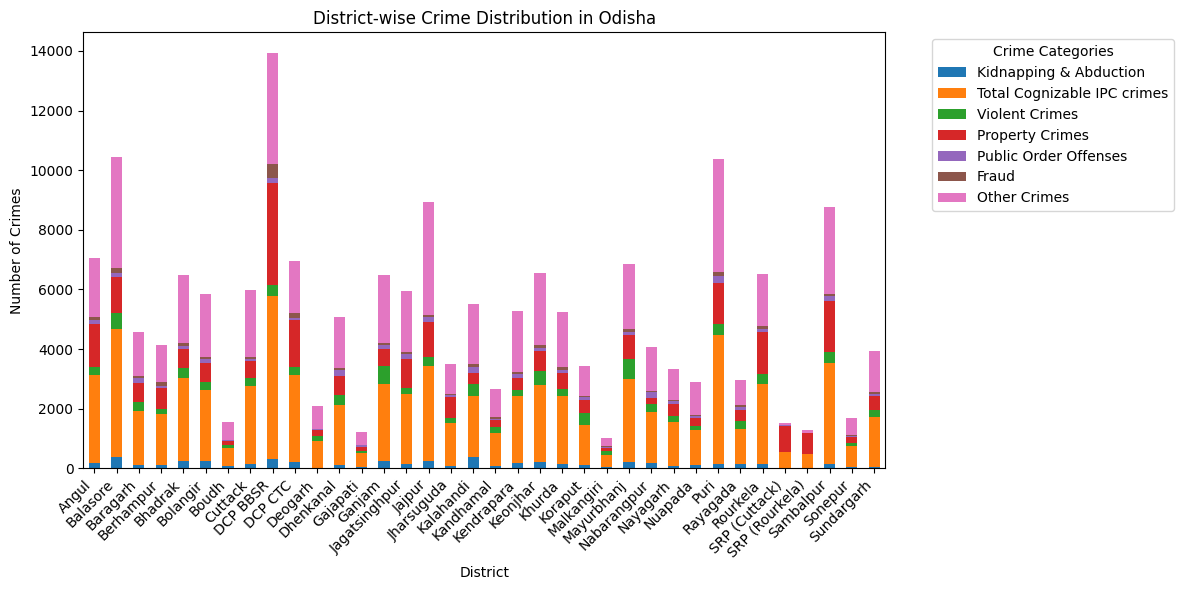

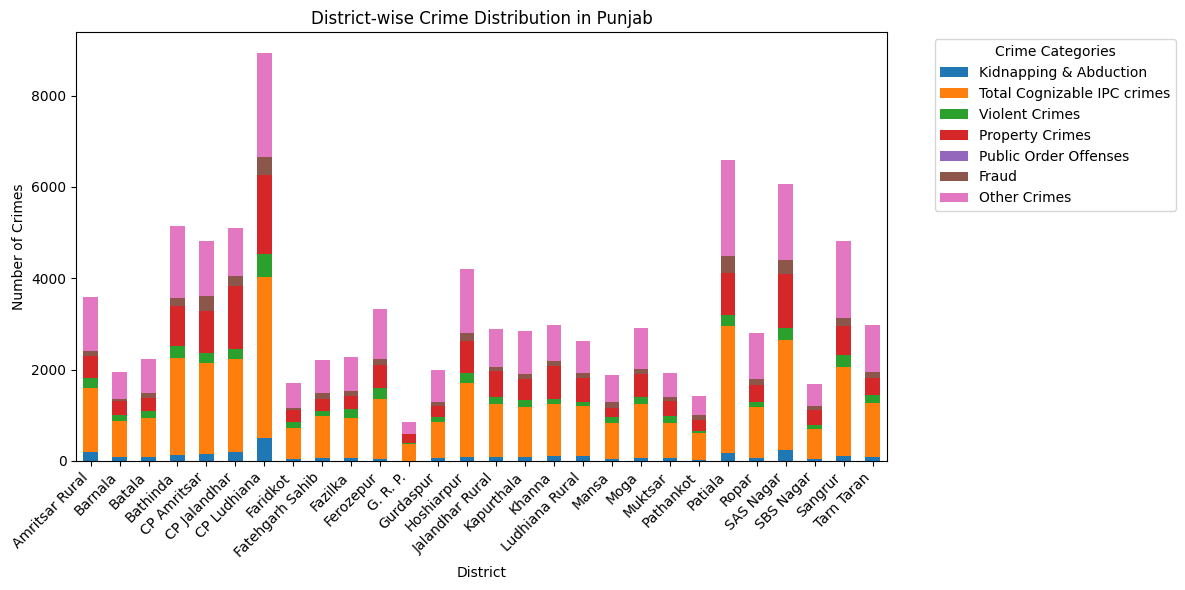

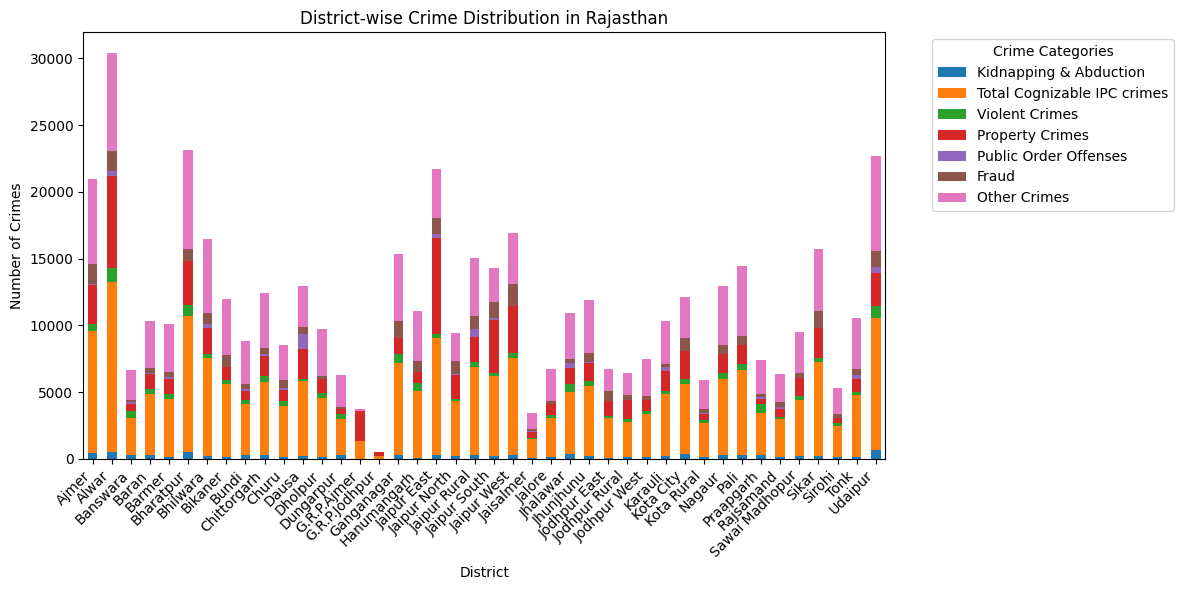

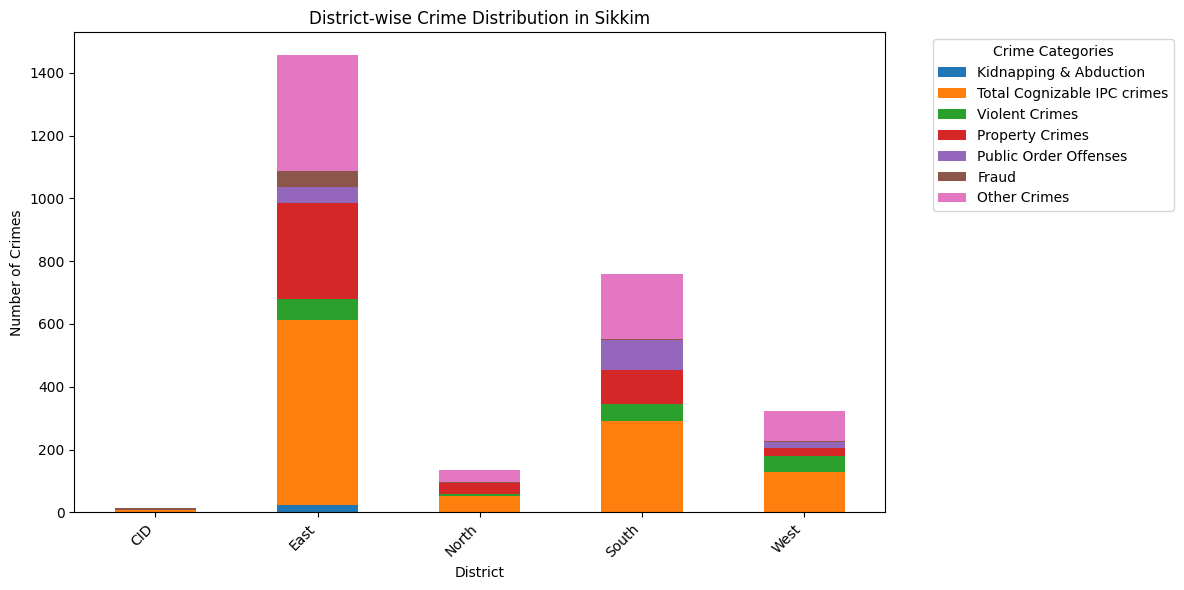

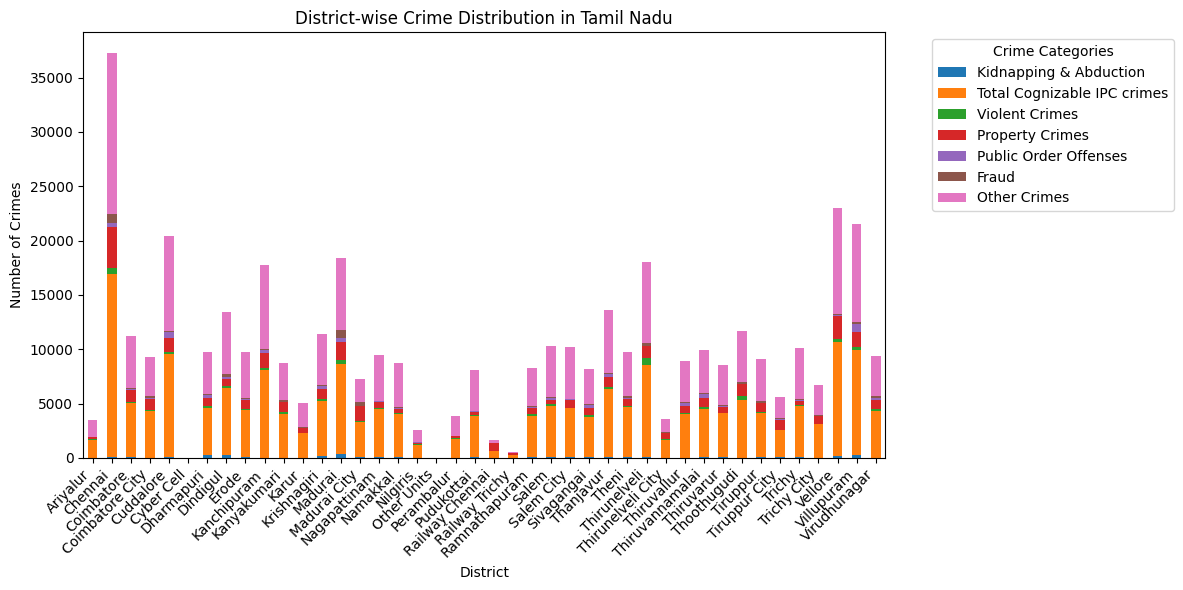

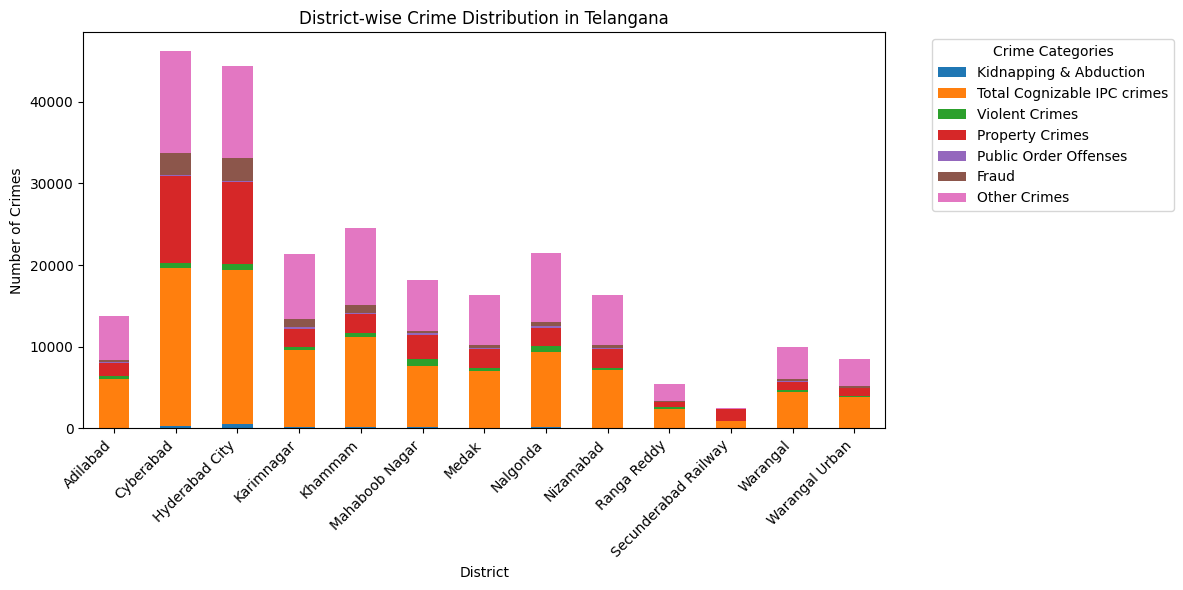

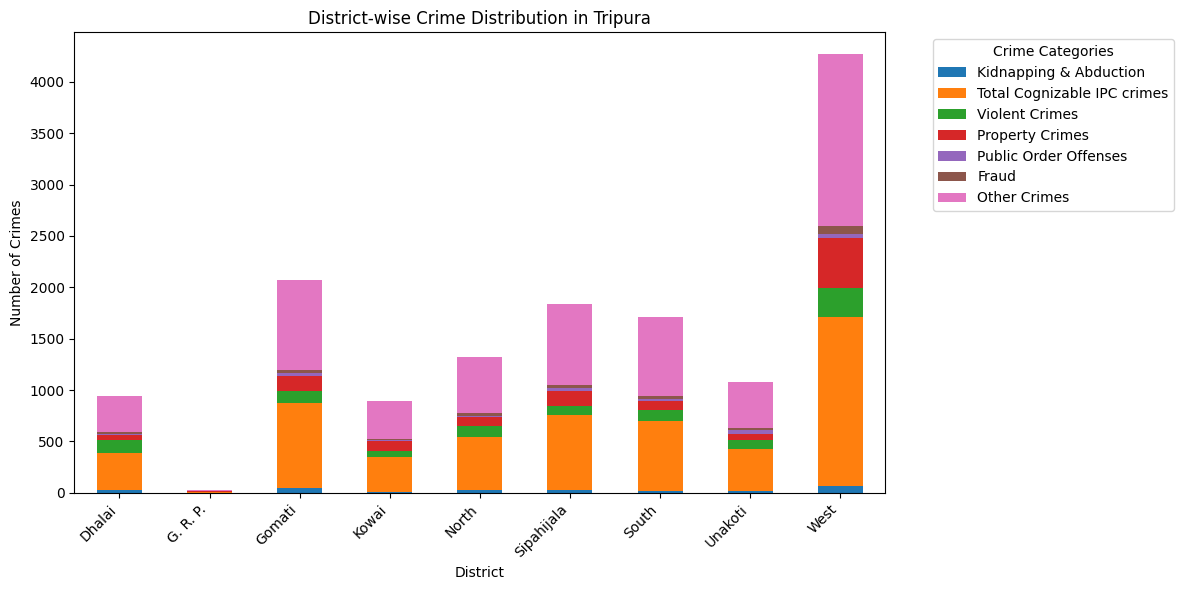

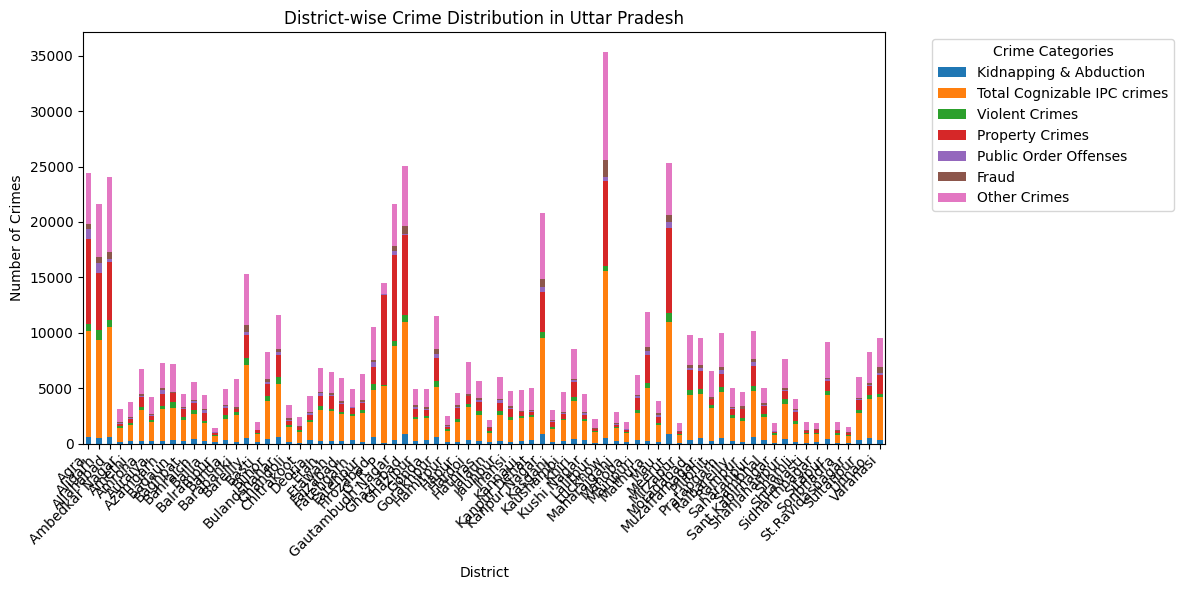

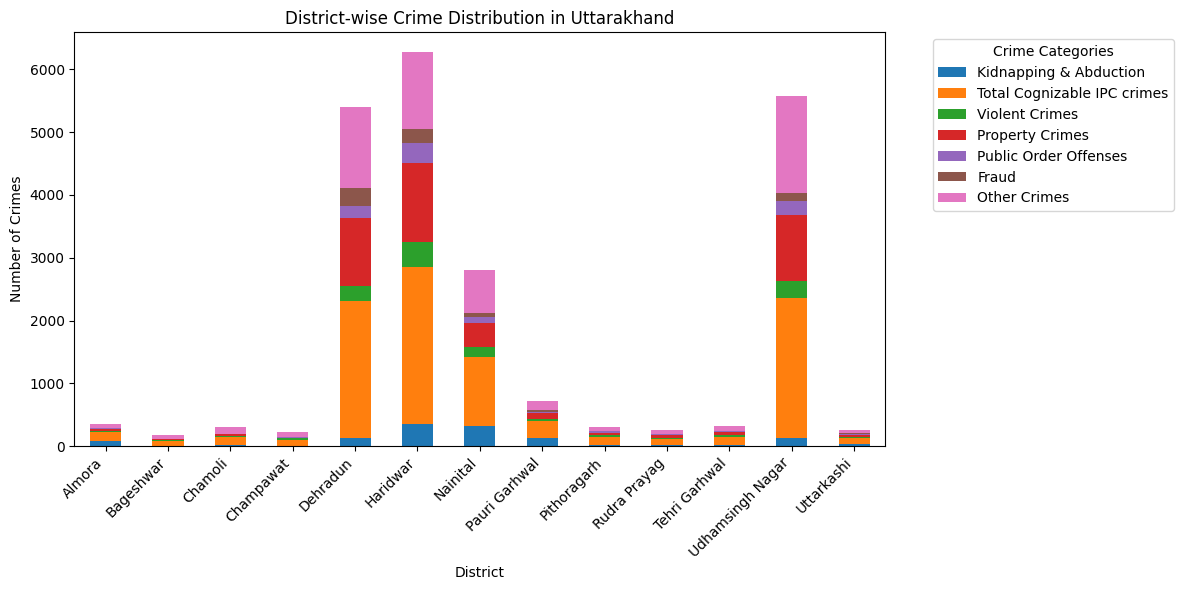

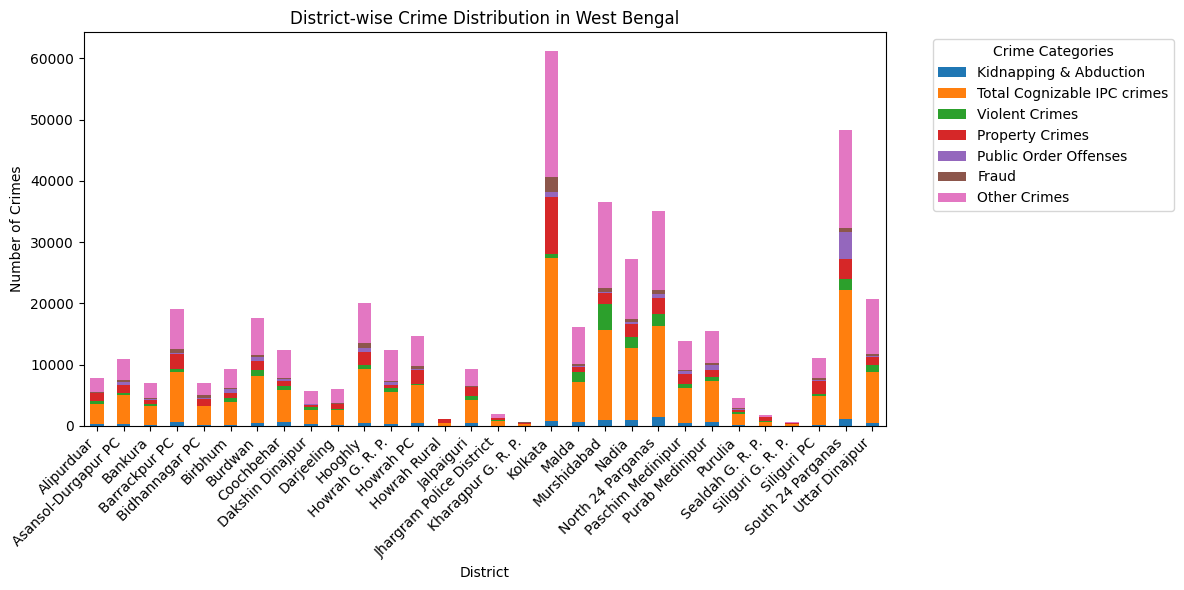

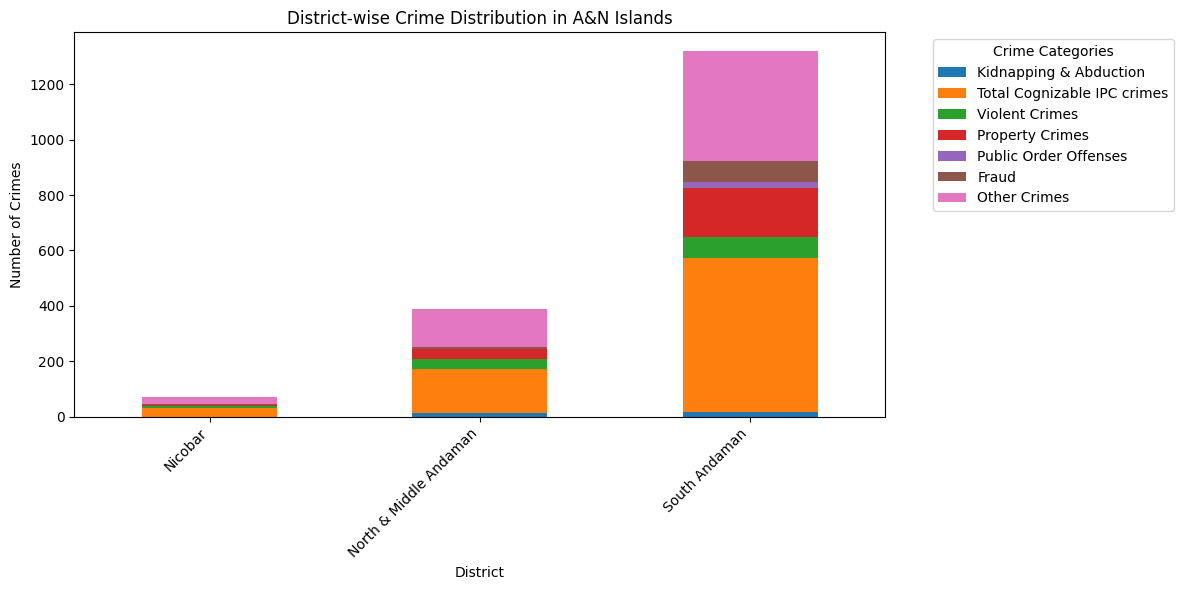

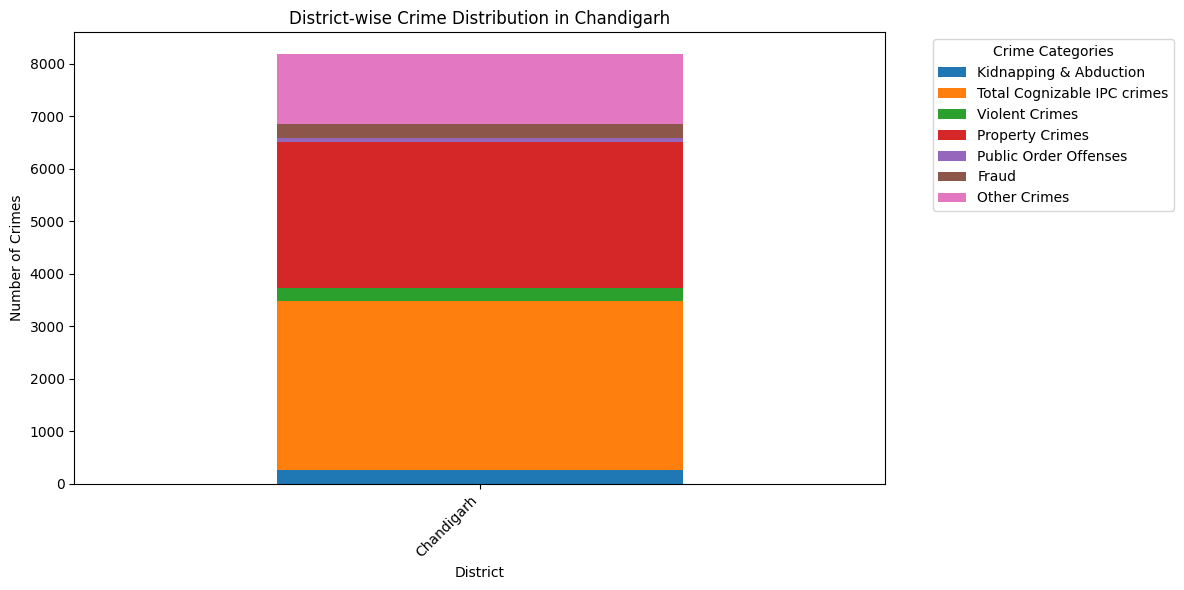

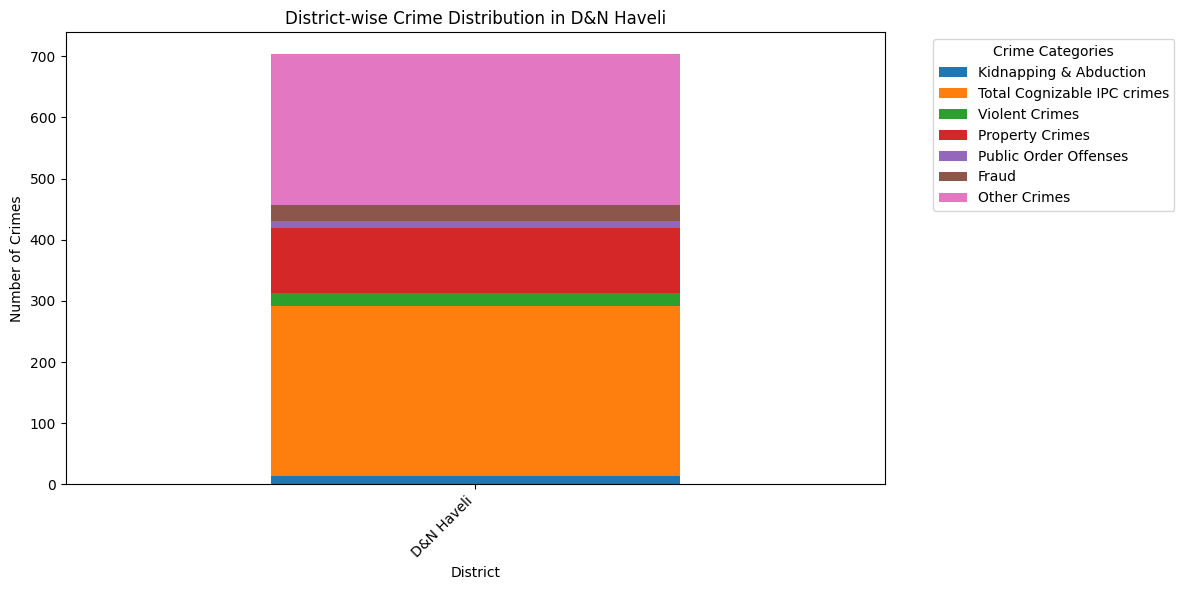

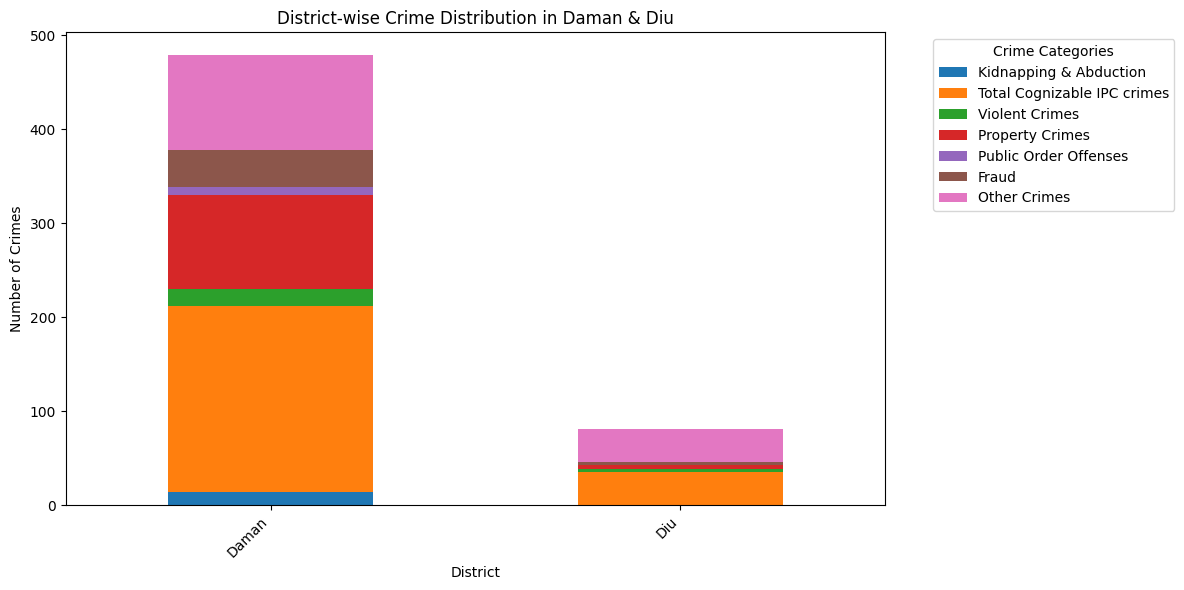

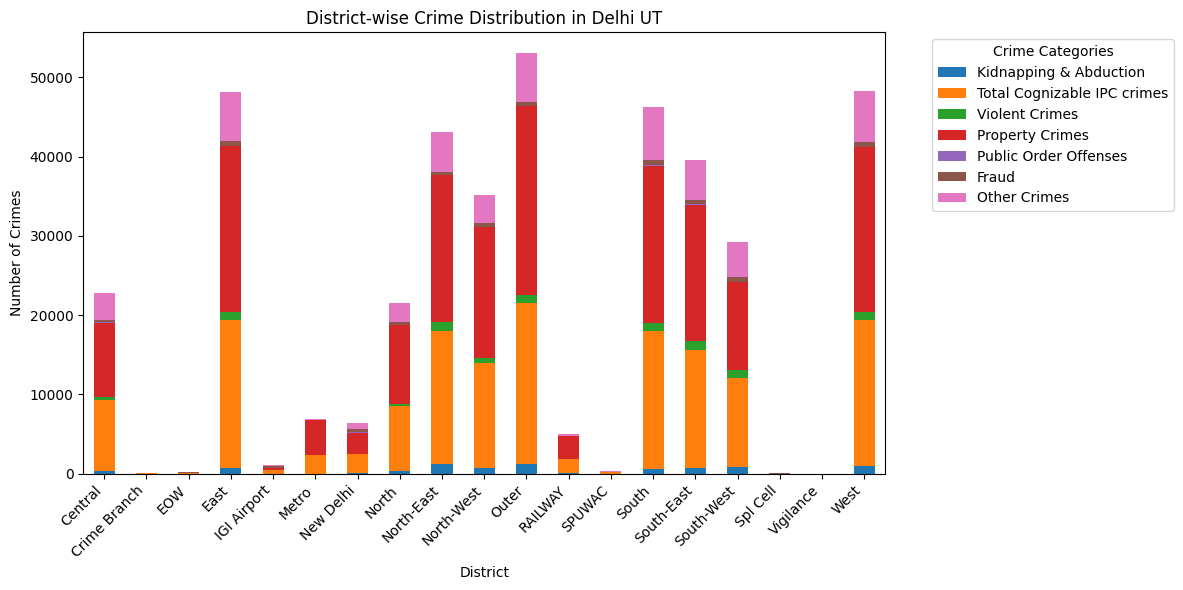

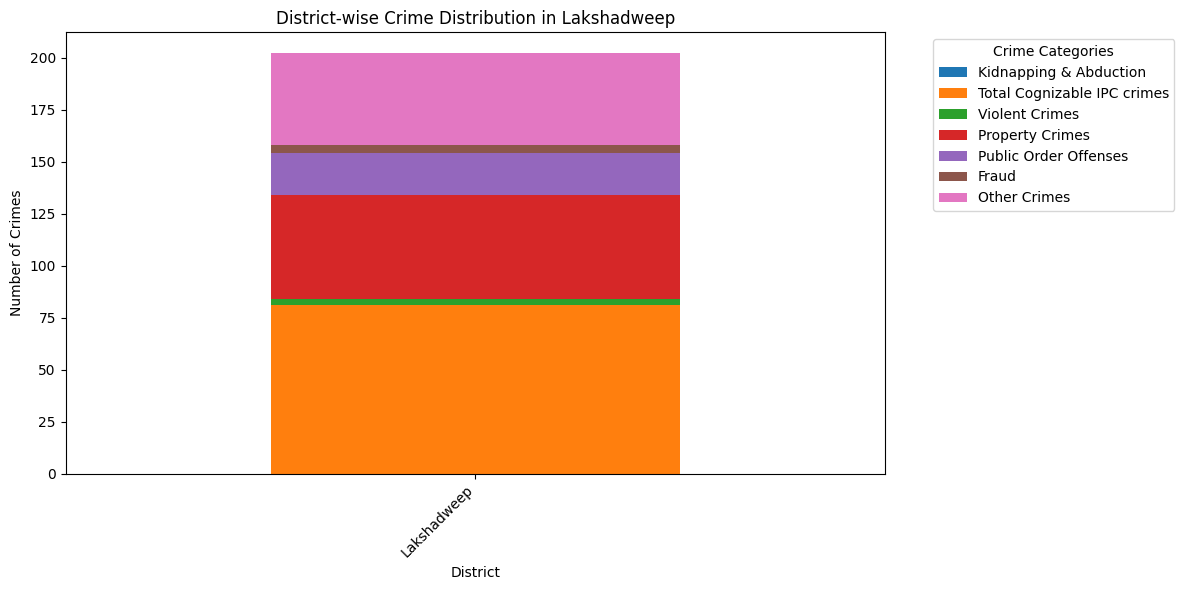

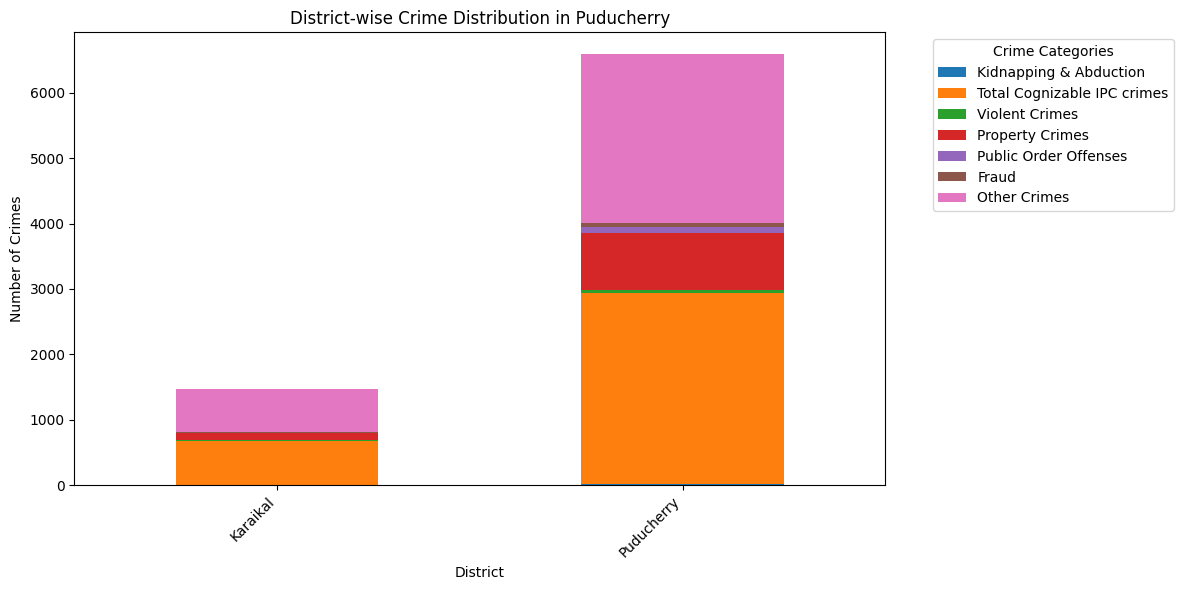

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('data_with_broad_categories.csv')

# Remove rows where the district is 'Total' (optional, modify if needed)
data = data[data['District'] != 'Total']

# Define broader categories based on the columns present in the dataset
border_categories = data.columns[3:]  # Skip 'State' and 'District' columns

# State-wise crime distribution
state_crime_counts = data.groupby('State')[border_categories].sum()

# Plotting state-wise crime distribution
state_crime_counts.plot(kind='bar', figsize=(12, 8), stacked=True)
plt.xlabel('State')
plt.ylabel('Number of Crimes')
plt.title('State-wise Crime Distribution')
plt.legend(title='Crime Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# District-wise crime distribution
district_crime_counts = data.groupby(['State', 'District'])[border_categories].sum()

# Plotting district-wise crime distribution
for state in data['State'].unique():
    state_data = district_crime_counts.loc[state]
    state_data.plot(kind='bar', figsize=(12, 6), stacked=True)
    plt.xlabel('District')
    plt.ylabel('Number of Crimes')
    plt.title(f'District-wise Crime Distribution in {state}')
    plt.legend(title='Crime Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



In [ ]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'crime_data'
# Replace 'crime_data.csv' with the actual path to your dataset
crime_data = pd.read_csv('data_with_broad_categories.csv')

# Group by 'State' and 'Year' and sum the values for each state
statewise_data = crime_data.groupby(['State', 'Year']).sum().reset_index()

# Drop the 'District' column
statewise_data.drop('District', axis=1, inplace=True)

# Display the modified dataset
print(statewise_data)

# Assuming 'statewise_data' contains the modified DataFrame
# Replace 'modified_statewise_data.csv' with the desired name for your new CSV file
statewise_data.to_csv('modified_statewise_data.csv', index=False)



                State  Year  Kidnapping & Abduction  \
0         A&N Islands  2014                      30   
1      Andhra Pradesh  2014                    1777   
2   Arunachal Pradesh  2014                     241   
3               Assam  2014                    9646   
4               Bihar  2014                   12622   
5          Chandigarh  2014                     259   
6        Chhattisgarh  2014                    2754   
7          D&N Haveli  2014                      14   
8         Daman & Diu  2014                      14   
9            Delhi UT  2014                    7635   
10                Goa  2014                     170   
11            Gujarat  2014                    4576   
12            Haryana  2014                    6015   
13   Himachal Pradesh  2014                     539   
14    Jammu & Kashmir  2014                    1433   
15          Jharkhand  2014                    2746   
16          Karnataka  2014                    2900   
17        

In [ ]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'statewise_data'
# Replace 'statewise_data.csv' with the actual path to your dataset
statewise_data = pd.read_csv('modified_statewise_data.csv')

# Sum up all the crime columns to create a new column 'Total Crimes'
statewise_data['Total Crimes'] = statewise_data.iloc[:, 2:].sum(axis=1)

# Drop the individual crime columns
statewise_data.drop(statewise_data.columns[2:-1], axis=1, inplace=True)

statewise_data.to_csv('statewise_data_2014.csv', index=False)


In [ ]:
import folium
import pandas as pd

# Load GeoJSON file with state boundaries
india_states_geojson = 'states_india.geojson'

# Read statewise data
statewise_data = pd.read_csv('statewise_data_2014.csv')

# Initialize a Folium map centered around India
map = folium.Map(location=[20.5937, 78.9629], zoom_start=4)

# Add choropleth layer to the map
folium.Choropleth(
    geo_data=india_states_geojson,
    name='choropleth',
    data=statewise_data,
    columns=['State', 'Total Crimes'],
    key_on='feature.properties.st_nm',  # Use 'st_nm' for the key
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Total Crimes'
).add_to(map)

# Display the map
map.save('choropleth_map.html')
